In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

#Datetime package
from datetime import date

In [4]:
start = pd.to_datetime('2020-01-01') #set start day-time
end = pd.to_datetime('2021-01-01') #set end day-time

In [5]:
ticker = ['NFLX'] #choose the stock

In [6]:
NT=yf.download(ticker,start=start, end=end) # get the stock data



day = np.arange(1, len(NT) + 1) #day to get the day time
NT['day'] = day # get the dataframe
NT.drop(columns=['Adj Close', 'Volume'], inplace = True) #drop the useless data
NT = NT[['day', 'Open', 'High', 'Low', 'Close']] #set the day,open,high,low,close
print(NT) #print the data


[*********************100%***********************]  1 of 1 completed
            day        Open        High         Low       Close
Date                                                           
2020-01-02    1  326.100006  329.980011  324.779999  329.809998
2020-01-03    2  326.779999  329.859985  325.529999  325.899994
2020-01-06    3  323.119995  336.359985  321.200012  335.829987
2020-01-07    4  336.470001  336.700012  330.299988  330.750000
2020-01-08    5  331.489990  342.700012  331.049988  339.260010
...         ...         ...         ...         ...         ...
2020-12-24  249  515.119995  519.349976  512.210022  513.969971
2020-12-28  250  516.429993  523.659973  507.130005  519.119995
2020-12-29  251  519.900024  536.549988  515.479980  530.869995
2020-12-30  252  530.130005  533.260010  523.690002  524.590027
2020-12-31  253  525.530029  545.500000  523.150024  540.729980

[253 rows x 5 columns]


In [7]:
NT['5-day'] = NT['Close'].rolling(5).mean() #get the rolling5 as short line
NT['10-day'] = NT['Close'].rolling(10).mean() #get the rolling10 as long line
NT.head()


/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_13165/727068757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NT['5-day'] = NT['Close'].rolling(5).mean() #get the rolling5 as short line
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_13165/727068757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NT['10-day'] = NT['Close'].rolling(10).mean() #get the rolling10 as long line


,day,Open,High,Low,Close,5-day,10-day
Date,,,,,,,
2020-01-02,1,326.100006,329.980011,324.779999,329.809998,NaN,NaN
2020-01-03,2,326.779999,329.859985,325.529999,325.899994,NaN,NaN
2020-01-06,3,323.119995,336.359985,321.200012,335.829987,NaN,NaN
2020-01-07,4,336.470001,336.700012,330.299988,330.750000,NaN,NaN
2020-01-08,5,331.489990,342.700012,331.049988,339.260010,332.309998,NaN


In [8]:

NT['signal'] = np.where(NT['5-day'] > NT['10-day'], 1, 0) #if short>long set 1 else 0 （golden fork buy）
NT['signal'] = np.where(NT['5-day'] < NT['10-day'], -1, NT['signal']) #if short< long set -1 else signal（dead fork）
NT.dropna(inplace=True) #drop the NA data (we could change the value)
NT.head()

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_13165/312035067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NT['signal'] = np.where(NT['5-day'] > NT['10-day'], 1, 0) #if short>long set 1 else 0
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_13165/312035067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NT['signal'] = np.where(NT['5-day'] < NT['10-day'], -1, NT['signal']) #if short< long set -1 else signal
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_de

,day,Open,High,Low,Close,5-day,10-day,signal
Date,,,,,,,,
2020-01-15,10,338.679993,343.170013,336.600006,339.070007,336.278003,334.294000,1
2020-01-16,11,343.500000,343.559998,335.850006,338.619995,336.870001,335.175000,1
2020-01-17,12,341.000000,341.570007,337.380005,339.670013,338.994006,336.552002,1
2020-01-21,13,340.000000,341.000000,332.589996,338.109985,338.832001,336.780002,1
2020-01-22,14,332.549988,336.299988,323.600006,326.000000,336.294000,336.305002,-1


In [9]:
NT['return'] = np.log(NT['Close']).diff()#find the first discrete difference of objects over the given axis
NT['system_return'] = NT['signal'] * NT['return'] #get the system return with signal*return
NT['entry'] = NT.signal.diff() #set different number as entry
NT.to_csv('NT_data.csv') #to csv

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_13165/3836730340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NT['return'] = np.log(NT['Close']).diff()#find the first discrete difference of objects over the given axis
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_13165/3836730340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NT['system_return'] = NT['signal'] * NT['return'] #get the system return with signal*return
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykern

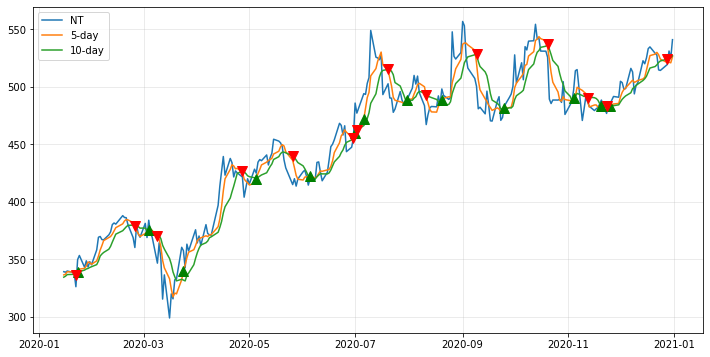

In [10]:
plt.rcParams['figure.figsize'] = 12, 6 #set the figure size
plt.grid(True, alpha = .3) #set the grid with clarity 0.3
plt.plot(NT.iloc[-252:]['Close'], label = 'NT')  #get NT stock index 252 days
plt.plot(NT.iloc[-252:]['5-day'], label = '5-day') #plot short
plt.plot(NT.iloc[-252:]['10-day'], label = '10-day') #plot long
plt.plot(NT[-252:].loc[NT.entry == 2].index, NT[-252:]['5-day'][NT.entry == 2], '^',
         color = 'g', markersize = 10) #set the color green buy:entry==2
plt.plot(NT[-252:].loc[NT.entry == -2].index, NT[-252:]['10-day'][NT.entry == -2], 'v',
         color = 'r', markersize = 10) #set the color red sell entry==-2
plt.legend(loc=2);#Place a legend on the Axes


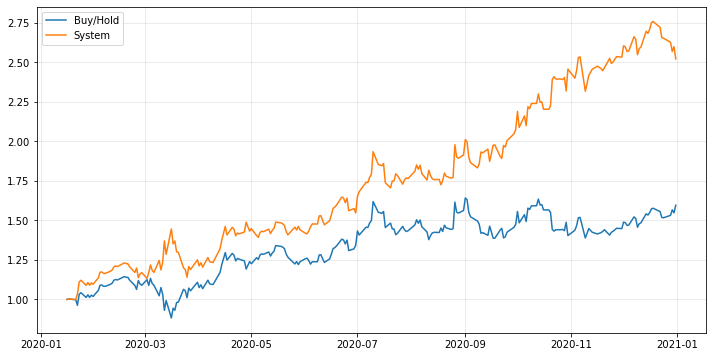

In [11]:

plt.plot(np.exp(NT['return']).cumprod(), label='Buy/Hold') #calculate the normal stock return 
plt.plot(np.exp(NT['system_return']).cumprod(), label='System') #calculate the MA strategy return
plt.legend(loc=2)
plt.grid(True, alpha=.3)


In [12]:
#return
np.exp(NT['return']).cumprod()[-1] -1 #get the return

0.5947443559987391

In [13]:
#MA return
np.exp(NT['system_return']).cumprod()[-1] -1 #get the MA return

1.5214498424481913

In [14]:
print(NT['system_return']) 

Date
2020-01-15         NaN
2020-01-16   -0.001328
2020-01-17    0.003096
2020-01-21   -0.004603
2020-01-22    0.036474
                ...   
2020-12-24   -0.000992
2020-12-28   -0.009970
2020-12-29   -0.022382
2020-12-30    0.011900
2020-12-31   -0.030303
Name: system_return, Length: 244, dtype: float64


In [15]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
df=DataFrame(NT['system_return'])
dfreturn=DataFrame(NT['return'])
df.to_csv('df_data.csv')
dfreturn.to_csv('dfreturn.csv') #in to csv

In [16]:
df2=pd.read_csv('df_data.csv')
df2
df3=df2['system_return']
df3=df3.dropna()
df3

print(df3)
dfreturn=pd.read_csv('dfreturn.csv')
dfreturn=dfreturn['return']
dfreturn

1     -0.001328
2      0.003096
3     -0.004603
4      0.036474
5      0.069892
         ...   
239   -0.000992
240   -0.009970
241   -0.022382
242    0.011900
243   -0.030303
Name: system_return, Length: 243, dtype: float64


0           NaN
1     -0.001328
2      0.003096
3     -0.004603
4     -0.036474
         ...   
239   -0.000992
240    0.009970
241    0.022382
242   -0.011900
243    0.030303
Name: return, Length: 244, dtype: float64

In [19]:
#manage the data

In [47]:
da=pd.read_csv('NT_data.csv')

In [48]:
#sell time
dasell=da[da['entry']==2]
dasell=pd.DataFrame(dasell)
print(dasell['Date'])
print('-------------')
#buy time
dabuy=da[da['entry']==-2]
dabuy=pd.DataFrame(dabuy)
print(dabuy['Date'])


5      2020-01-23
33     2020-03-04
47     2020-03-24
76     2020-05-05
98     2020-06-05
116    2020-07-01
118    2020-07-06
137    2020-07-31
151    2020-08-20
176    2020-09-25
204    2020-11-04
216    2020-11-20
219    2020-11-25
Name: Date, dtype: object
-------------
4      2020-01-22
27     2020-02-25
36     2020-03-09
70     2020-04-27
90     2020-05-26
115    2020-06-30
117    2020-07-02
128    2020-07-20
144    2020-08-11
164    2020-09-09
193    2020-10-20
210    2020-11-12
217    2020-11-23
240    2020-12-28
Name: Date, dtype: object


In [52]:
#calculate sharpe ratio, and sharpe yearly return

#sharpe ratio
def calculate_sharp(data):
    
    avg_return = data.mean()
    std_return = data.std()
    sharp = avg_return / std_return
    sharp_year = sharp * np.sqrt(252)
    return sharp, sharp_year


In [53]:
print(calculate_sharp(df3)) #system_return sharpe

(0.13004967839435294, 2.064474642692326)


In [54]:
print(calculate_sharp(dfreturn)) #return sharpe

(0.06521753932961961, 1.0352963411144855)


In [55]:
#calculate the maximum drawdown
df3=list(df3) #need to turn into list to calculate drawdown
def get_max_drawdown_fast(array):
    drawdowns = []
    max_so_far = array[0]
    for i in range(len(array)):
        if array[i] > max_so_far:
            drawdown = 0
            drawdowns.append(drawdown)
            max_so_far = array[i]
        else:
            drawdown = max_so_far - array[i]
            drawdowns.append(drawdown)
    return max(drawdowns)

In [56]:
get_max_drawdown_fast(df3)

0.20794177596544988